<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [10]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=25).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

plt.rcParams["figure.dpi"] = 200

## 2.1 맷플롯립을 사용한 그래프 그리기의 기본(Basic Matplotlib plots)

In [11]:
def generate_data():
  x = range(0, 10)
  y = [2 * value for value in x]
  return x, y  

def is_in_interval(v, s, e):
  return v >= s and v <= e

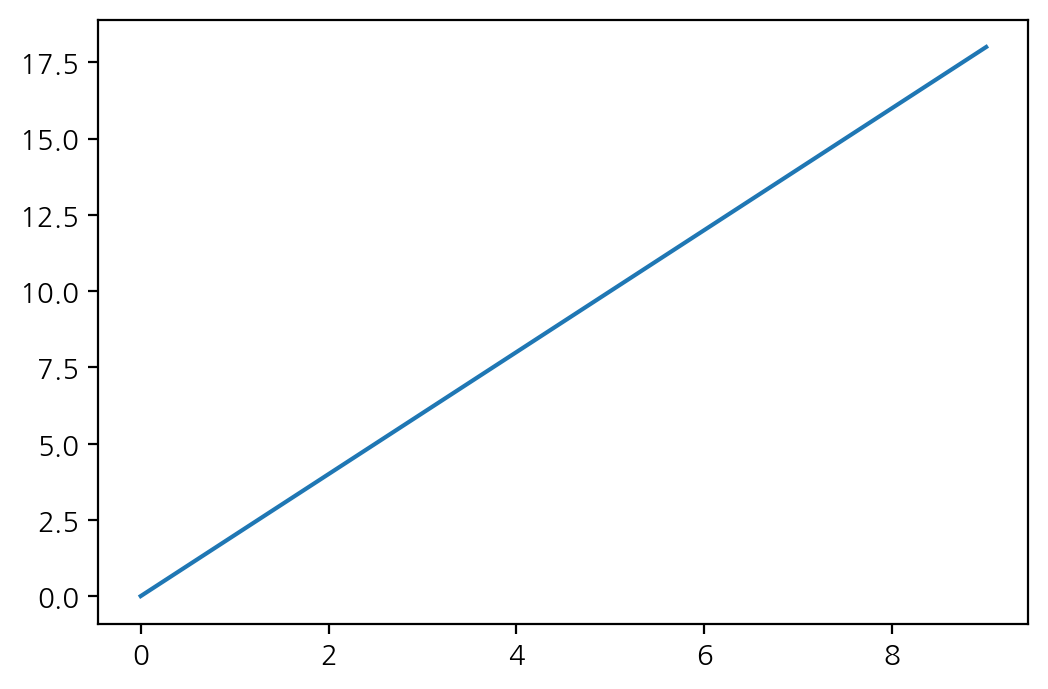

In [12]:
x , y = generate_data()
plt.plot(x, y)
plt.show()

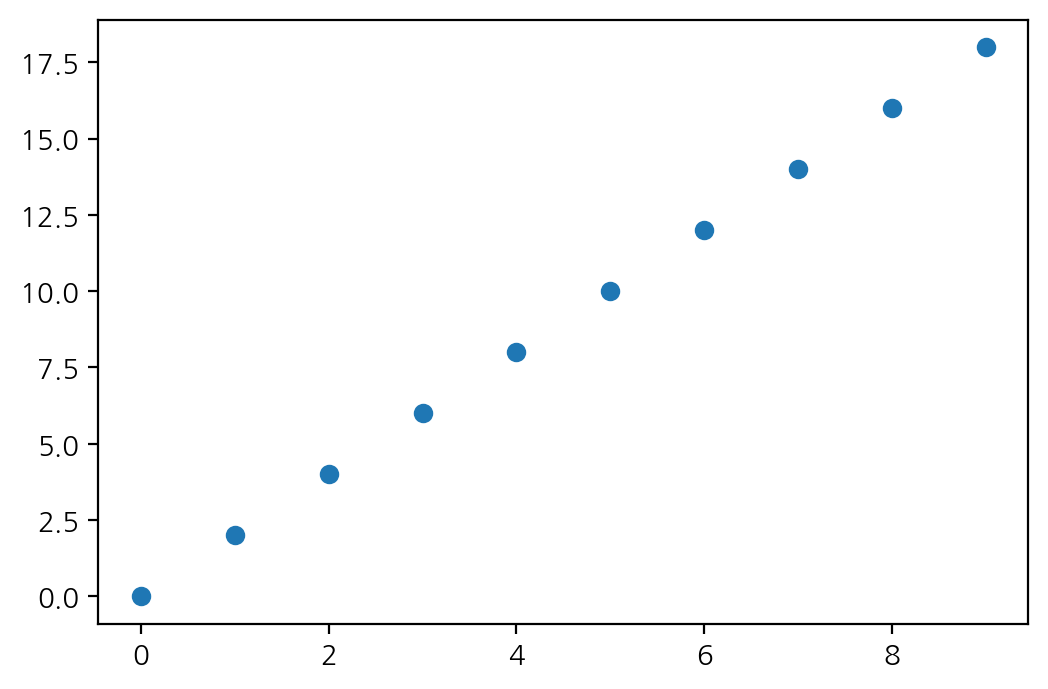

In [13]:
x , y = generate_data()

plt.scatter(x, y)
plt.show()

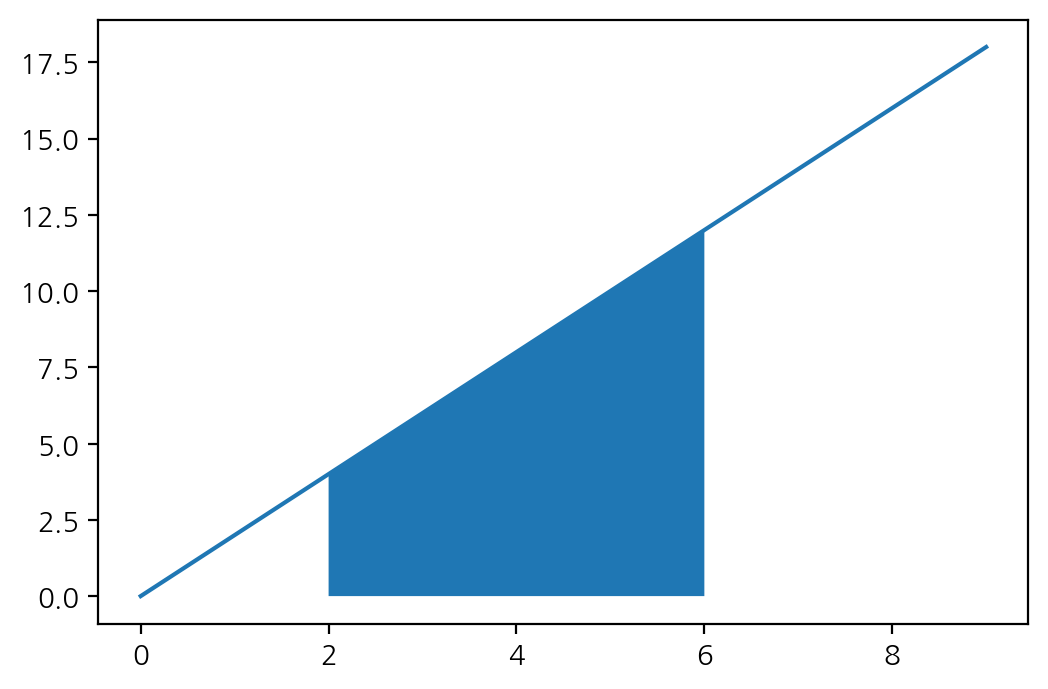

In [14]:
x , y = generate_data()

plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

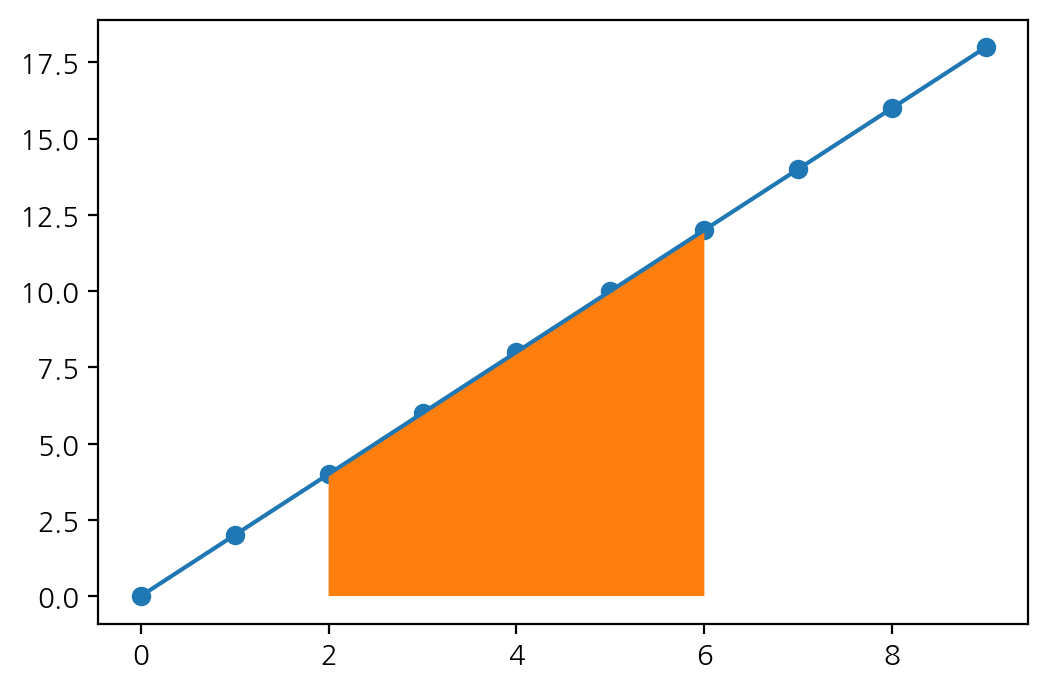

In [15]:
x , y = generate_data()
where = [is_in_interval(value, 2, 6) for value in x]

plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

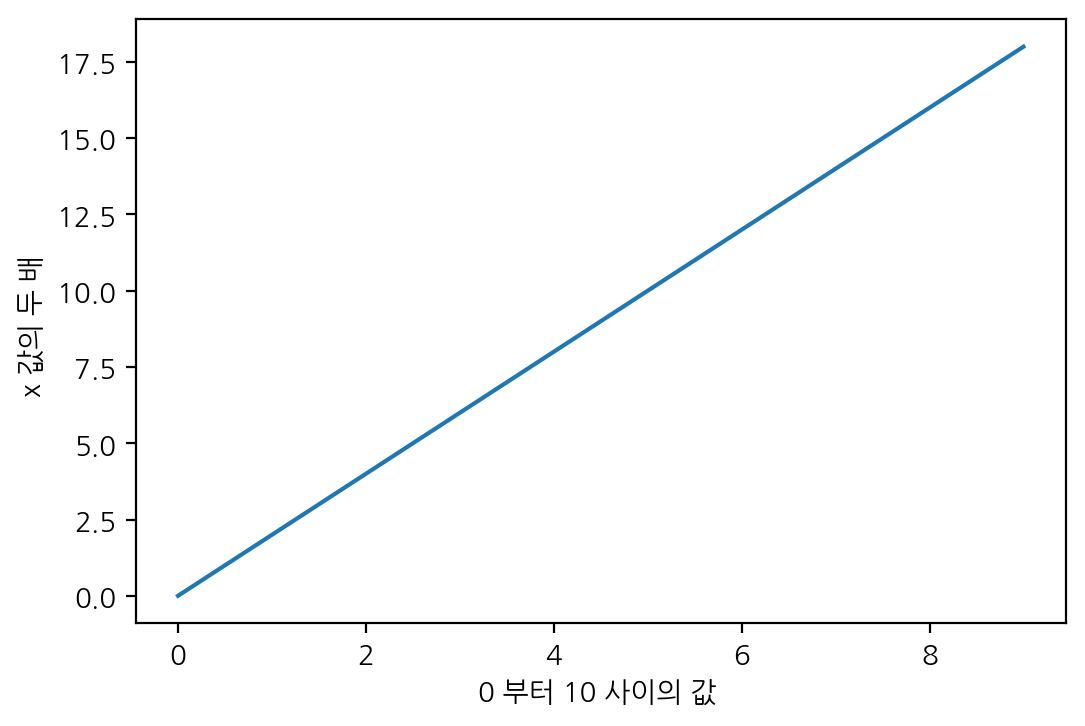

In [16]:
x , y = generate_data()

plt.plot(x, y)
plt.xlabel('0 부터 10 사이의 값 ')
plt.ylabel('x 값의 두 배 ')
plt.show()

## 2.2	동전 뒤집기 확률 그래프 그리기(Plotting coin-flip probabilities)

In [17]:
from itertools import product
from collections import defaultdict

def generate_coin_sample_space(num_flips=10):
  weighted_sample_space = defaultdict(int)
  for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
    heads_count = len([outcome for outcome in coin_flips
                      if outcome == 'Heads'])
    weighted_sample_space[heads_count] += 1
  return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()

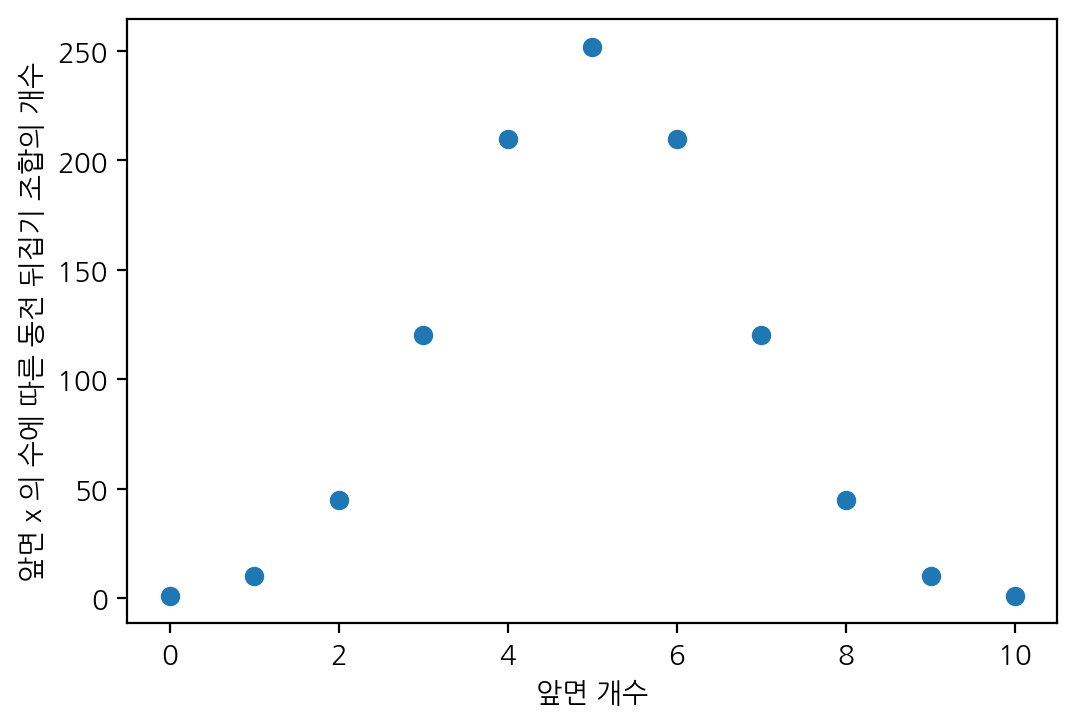

In [18]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]

plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('앞면 개수')
plt.ylabel('앞면 x 의 수에 따른 동전 뒤집기 조합의 개수')

plt.show()

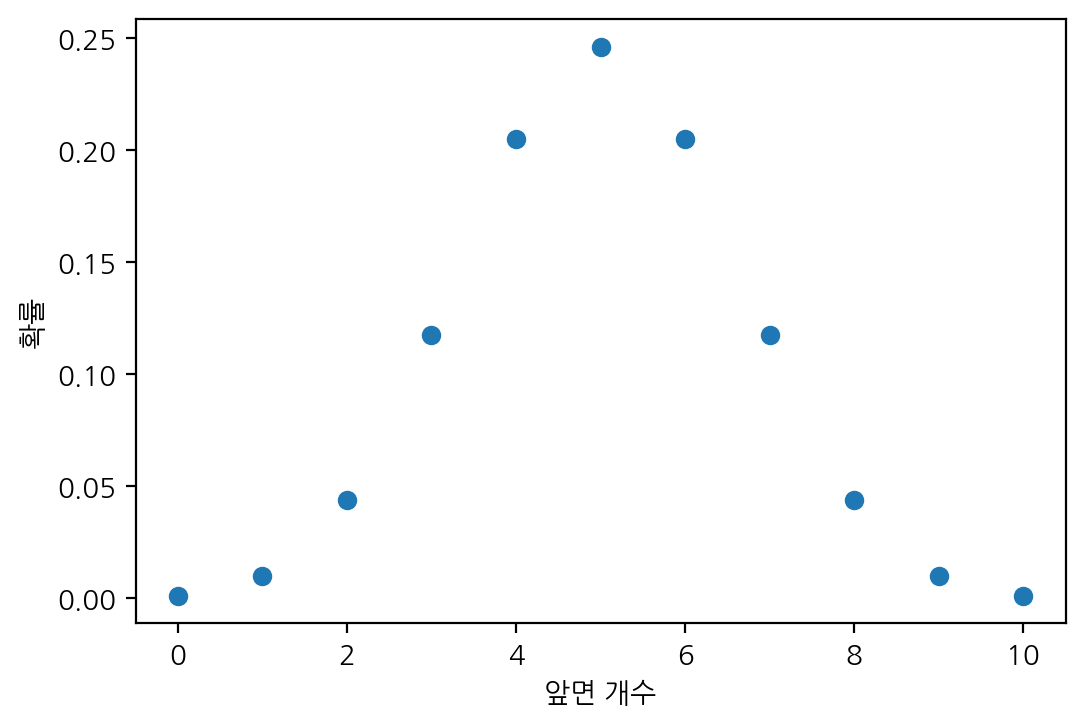

In [19]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]

plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('앞면 개수')
plt.ylabel('확률')

plt.show()

In [20]:
assert sum(prob_x_10_flips) == 1.0

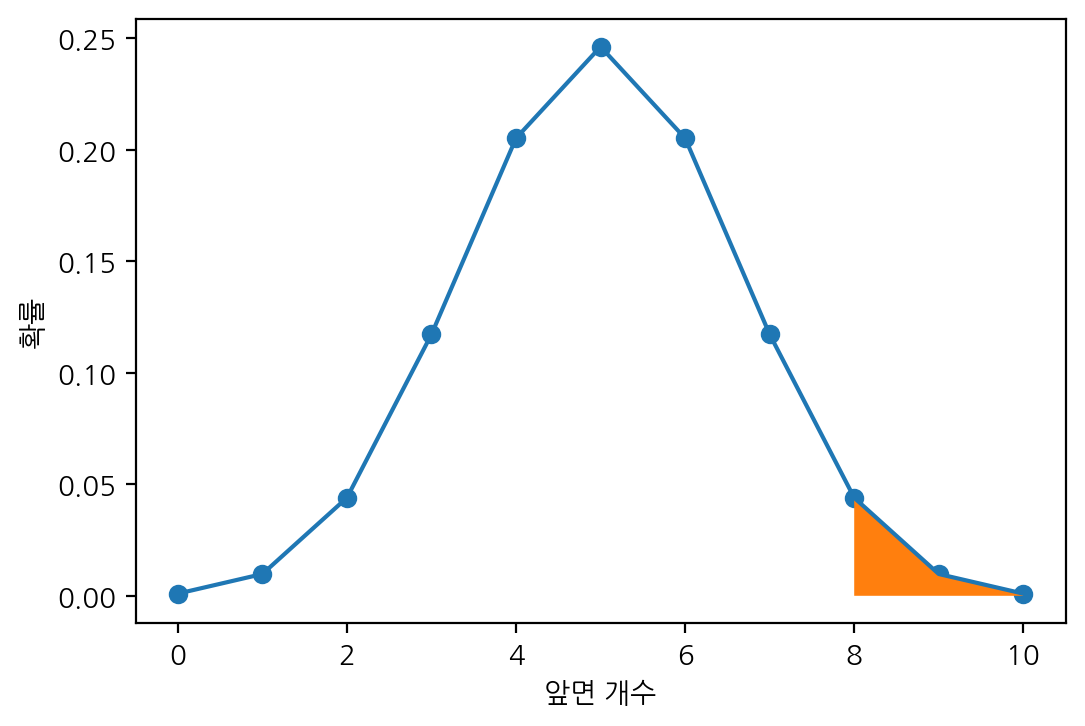

In [22]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)

plt.xlabel('앞면 개수')
plt.ylabel('확률')

plt.show()

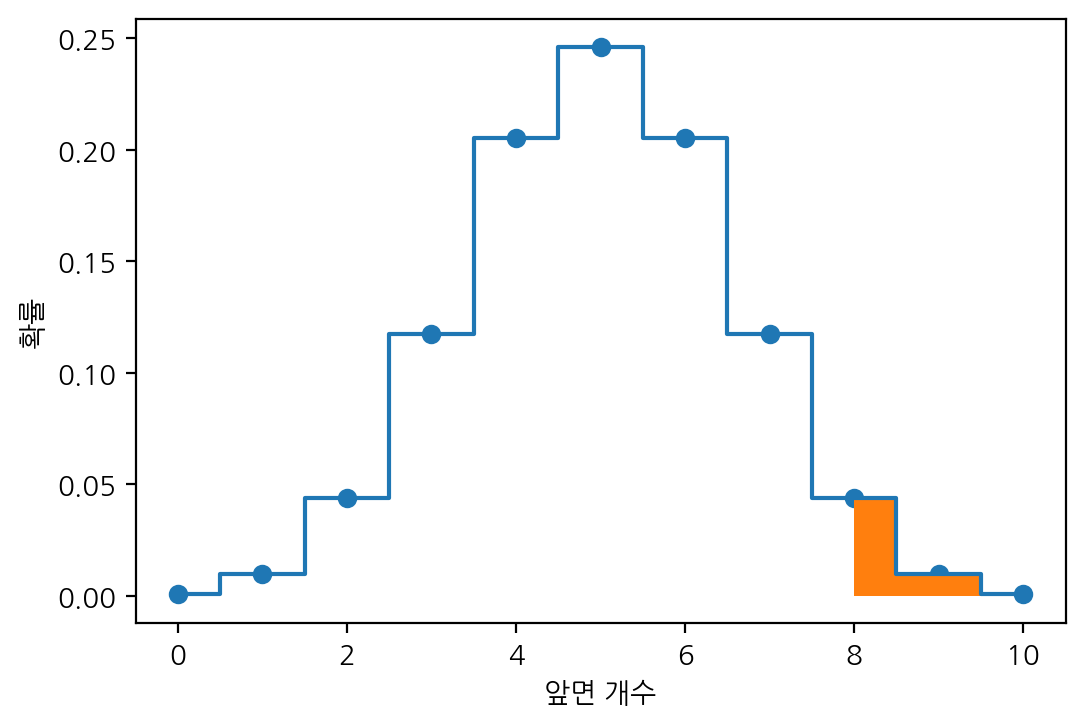

In [25]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]

plt.plot(x_10_flips, prob_x_10_flips, ds='steps-mid')
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where, step='mid')

plt.xlabel('앞면 개수')
plt.ylabel('확률')

plt.show()

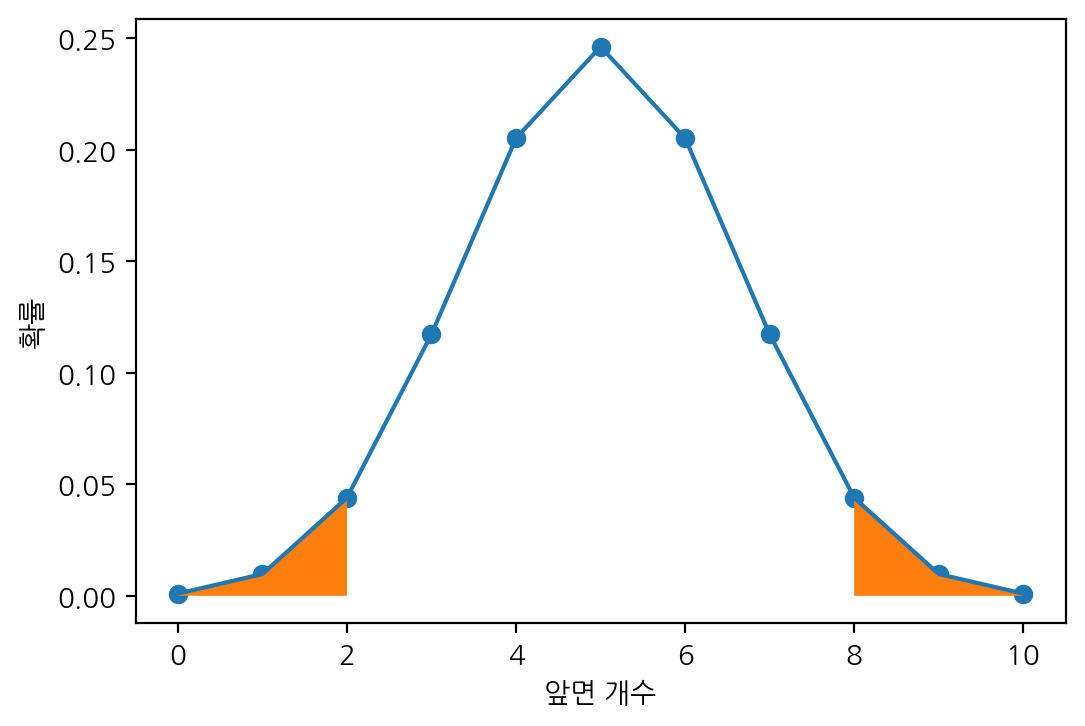

In [23]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)

plt.xlabel('앞면 개수')
plt.ylabel('확률')

plt.show()

### 2.2.1 여러 동전 뒤집기 확률 분포도 비교하기(Comparing multiple coin-flip probability distributions)

In [27]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)


In [28]:
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

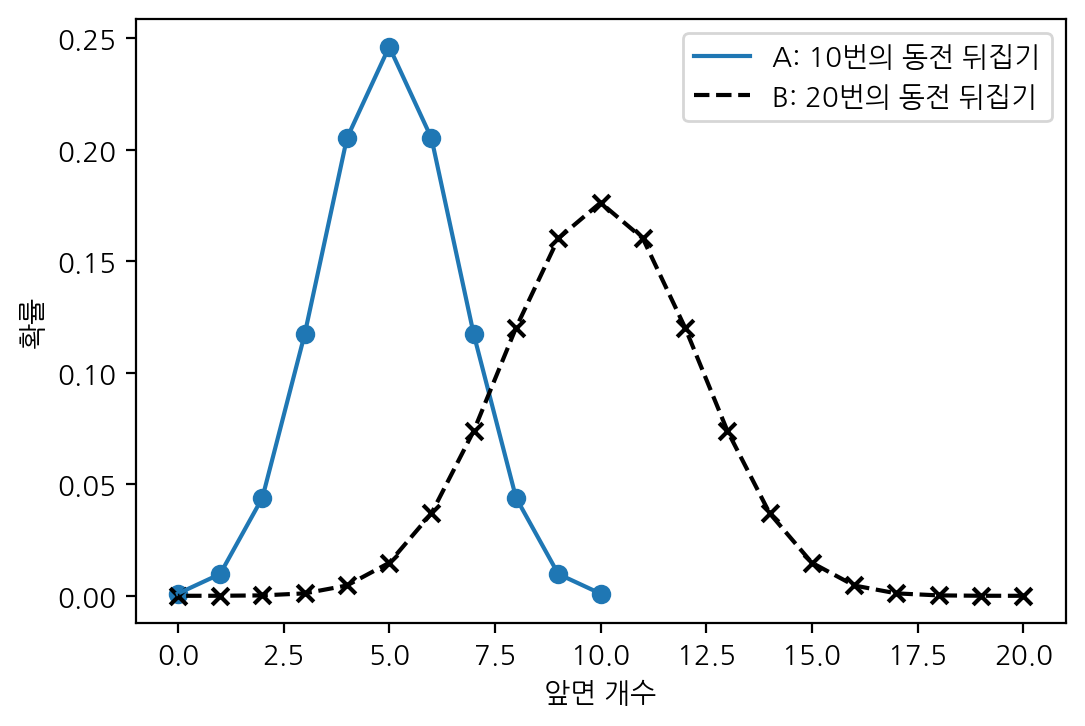

In [31]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10번의 동전 뒤집기')
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--', label='B: 20번의 동전 뒤집기')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel('앞면 개수')
plt.ylabel('확률')
plt.legend()
plt.show()


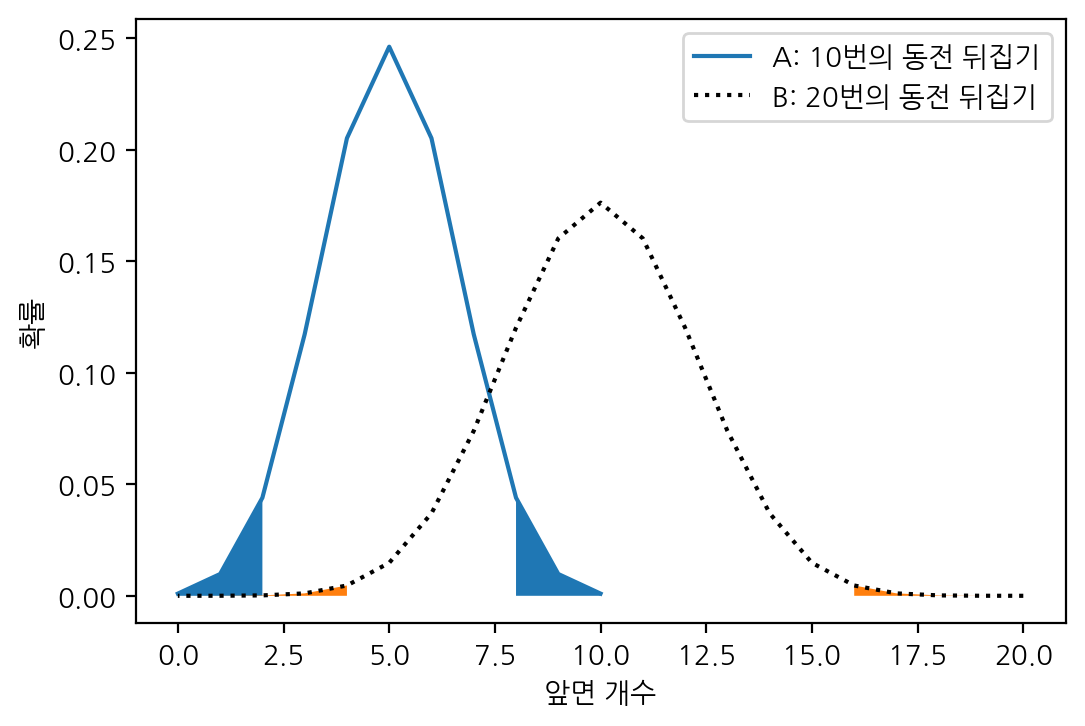

In [34]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10번의 동전 뒤집기')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle=':',
label='B: 20번의 동전 뒤집기')
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)
plt.xlabel('앞면 개수')
plt.ylabel('확률')
plt.legend()
plt.show()


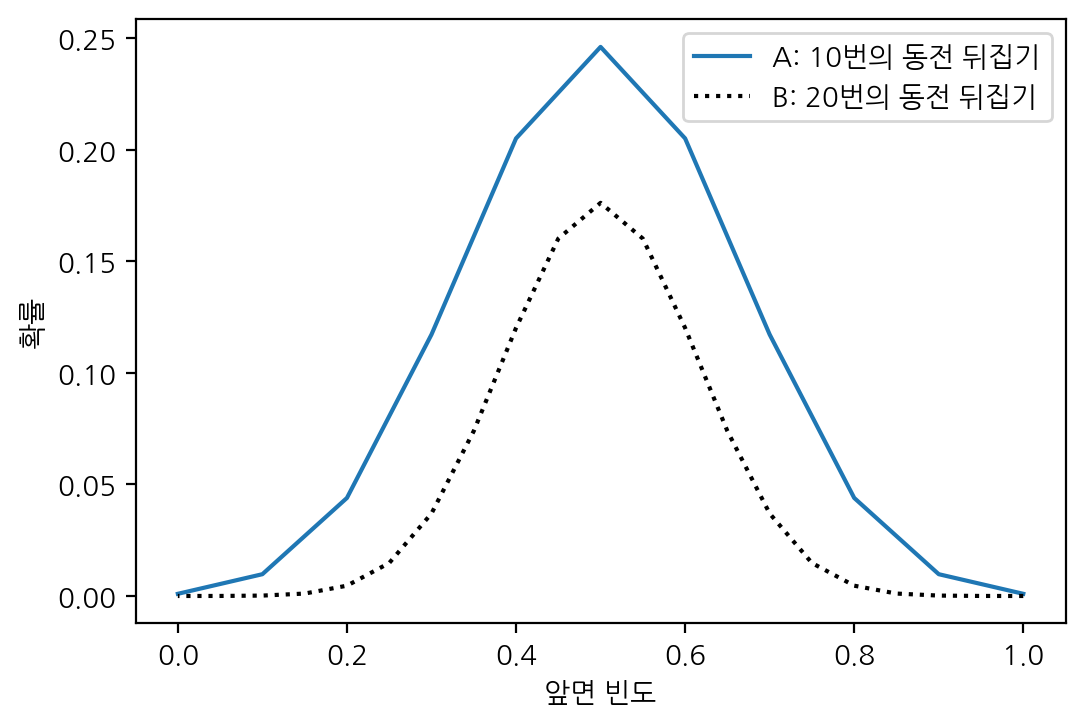

In [36]:
x_10_frequencies = [head_count /10 for head_count in x_10_flips]
x_20_frequencies = [head_count /20 for head_count in x_20_flips]
plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10번의 동전 뒤집기')
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':',
label='B: 20번의 동전 뒤집기')
plt.legend()
plt.xlabel('앞면 빈도')
plt.ylabel('확률')
plt.show()

In [37]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

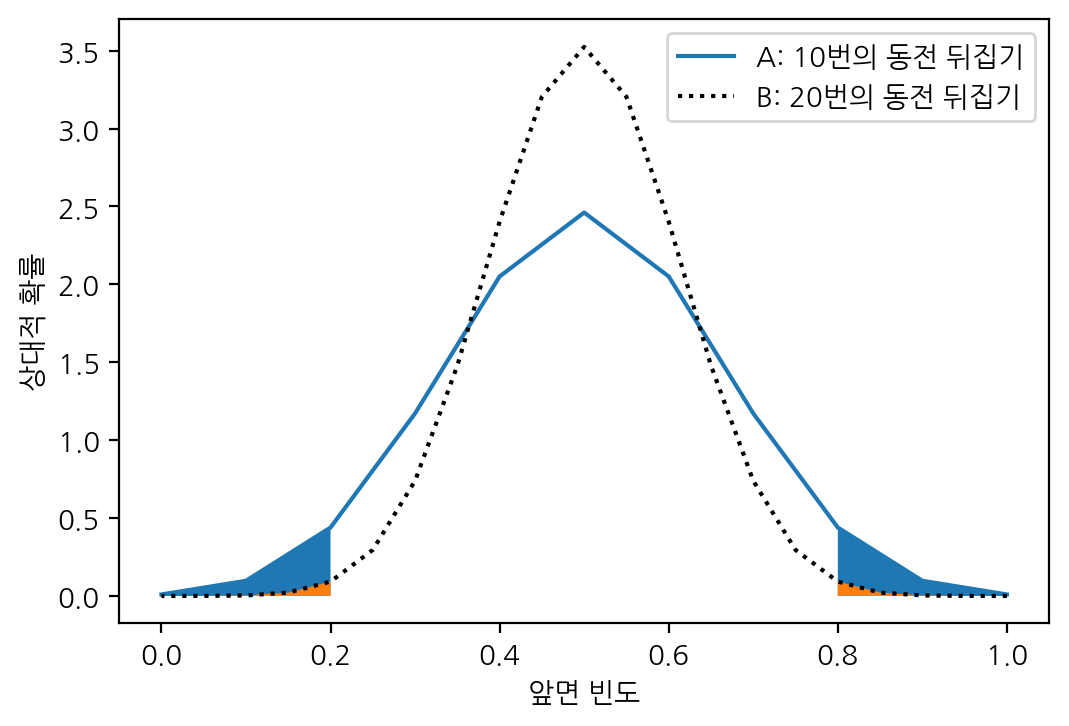

In [39]:
plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10번의 동전 뒤집기')
plt.plot(x_20_frequencies, relative_likelihood_20, color='k',
linestyle=':', label='B: 20번의 동전 뒤집기')
plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)
plt.legend()
plt.xlabel('앞면 빈도')
plt.ylabel('상대적 확률')
plt.show()